# Mission to Mars

Now let's try to plan a mission from Earth to Mars. Define a third object, a spacecraft. Give it the same initial position as Earth, but slightly more velocity.



In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# In addition to the imports, we'll also import some constants
# And also define our own
# NOTE: All units in SI
from scipy.constants import gravitational_constant, au

year = 365.25*24*3600 # seconds

mass_sun = 1.989e30 # kg

earth_distance = 1.496e11 # meters
# The Earth distance is also defined as 1 AU
mars_distance = 227.9*1.e9 # meters
jupiter_distance = 778.57*1.e9 # meters

## Define your function from before

Please paste your `grav_derivs` function from before into here

In [2]:
scale_factor = gravitational_constant * mass_sun * year ** 2 / au ** 3

In [3]:
# Gravitational acceleration in 2D

def grav_derivs(state, t):
    x, y, vx, vy = state
    
    r =  (x ** 2 + y ** 2) ** 0.5 # Calculate the distance from x and y
    acc =  - scale_factor / r ** 2 # Calculate the magnitude of the acceleration
    acc_x =  acc * x / r # Calculate the vector components of the acceleration
    acc_y =  acc * y / r # Calculate the vector components of the acceleration
    
    return (vx, vy, acc_x, acc_y)

## Exercise

Make the initial conditions, integrate them to get `rarr5`, and make a plot of Earth, Mars and the spacecraft.

In [4]:
# Lets try boosting by ~5% in the y direction
r_init5 = (1., 0., 0., 1.05 * np.sqrt(scale_factor))
times = np.linspace(0., 100, 10000)
rarr5 = odeint(grav_derivs, r_init5, times)

The plotting code below requires r_arr2 and r_arr4 from the previous notebook, copy code to generate them here and then make the plot

In [5]:
r_init2 = (1., 0., 0., np.sqrt(scale_factor))
rarr2 = odeint(grav_derivs, r_init2, times)

r_mars = mars_distance / earth_distance
r_init4 = (r_mars, 0., 0., (scale_factor / r_mars) ** 0.5)
rarr4 = odeint(grav_derivs, r_init4, times)

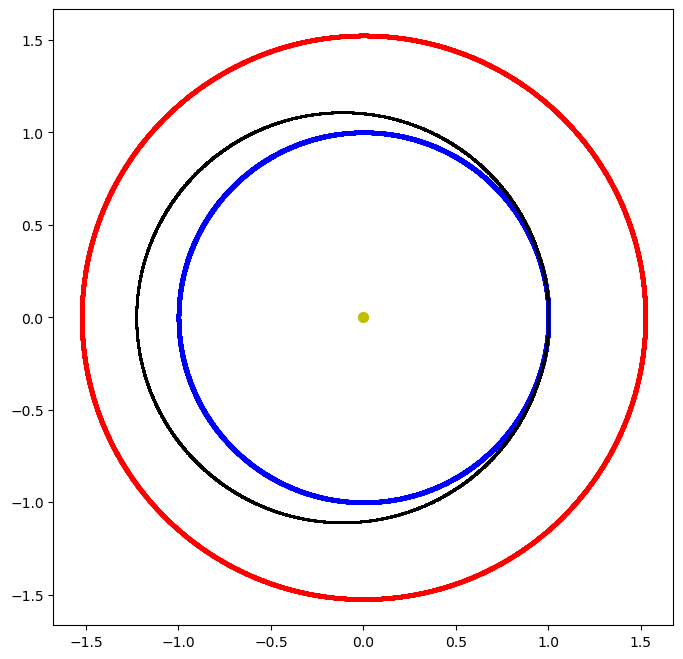

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(rarr2[:,0], rarr2[:,1], c='b', s=5)
plt.scatter(rarr4[:,0], rarr4[:,1], c='r', s=4)
plt.scatter(rarr5[:,0], rarr5[:,1], c='k', s=1)
plt.scatter(0., 0., c='y', s=50) # The sun
plt.gca().set_aspect('equal', 'datalim')

## Hohmann Transfer Orbit

A Hohmann transfer orbit is the minimum-energy way to go from one circular orbit to another in the same plane. It's an elliptical orbit that just barely touches both circular orbits. You can read about it on [Wikipedia](https://en.wikipedia.org/wiki/Hohmann_transfer_orbit).

For the initial conditions, we can start the spacecraft at the same position as Earth at $t = 0$, i.e. $(x, y) = (1, 0)$. But we need to choose the correct velocity to reach Mars's orbit. We could write down the energy equation and solve it, or we could let the computer solve it.

### Exercise

Write a function that takes the output of `odeint` and gives an array of the distance of the spacecraft from the Sun.

In [7]:
def get_distances(rarr):
    return (rarr[:,0] ** 2 + rarr[:,1] ** 2) ** 0.5

## Exercise

Now write a function that finds the maximum radius of the craft

In [8]:
def get_max_distance(rarr):
    return np.max(get_distances(rarr))

get_max_distance(rarr5)

np.float64(1.228411769124386)

## Exercise

Now put it together. Write a function that takes an initial velocity, solves the ODE, then finds the maximum radius that the orbit of the craft reaches. Test the function and make sure it gives sensible results (e.g. what happens when it has the same velocity as the Earth?).

In [9]:
def find_orbit_dist(launch_velocity):
    r_initO = (1., 0., 0., launch_velocity)
    times = np.linspace(0., 100, 10000)
    rarrO = odeint(grav_derivs, r_initO, times)
    return abs(get_max_distance(rarrO) - r_mars)


print(find_orbit_dist(np.sqrt(scale_factor)))
print(r_mars - 1)


0.5233957218638967
0.5233957219251337


Now let's automate finding the best value! Using `scipy.optimize.newton`, you can use Newton's method to find the root of a function. See the example below. You need to give it a function that returns zero when it's at the right answer, so it's good to have it return the square of the max distance minus the distance that you want it to reach (`r_mars`).


In [10]:
from scipy.optimize import newton

def test(x):
    return (x - 2.)**2

newton(test, 1.)

np.float64(1.999999984189928)

In [11]:
newton?

Signature:
newton(
    func,
    x0,
    fprime=None,
    args=(),
    tol=1.48e-08,
    maxiter=50,
    fprime2=None,
    x1=None,
    rtol=0.0,
    full_output=False,
    disp=True,
)
Docstring:
Find a root of a real or complex function using the Newton-Raphson
(or secant or Halley's) method.

Find a root of the scalar-valued function `func` given a nearby scalar
starting point `x0`.
The Newton-Raphson method is used if the derivative `fprime` of `func`
is provided, otherwise the secant method is used. If the second order
derivative `fprime2` of `func` is also provided, then Halley's method is
used.

If `x0` is a sequence with more than one item, `newton` returns an array:
the roots of the function from each (scalar) starting point in `x0`.
In this case, `func` must be vectorized to return a sequence or array of
the same shape as its first argument. If `fprime` (`fprime2`) is given,
then its return must also have the same shape: each element is the first
(second) derivative of `func`

## Exercise

Use `newton` to find an orbit for the spacecraft that leaves Earth, and just reaches Mars.

In [12]:
initial_guess =  1.05 * scale_factor ** 0.5

v_launch = newton(find_orbit_dist, initial_guess)

# Print the values, so that we see that the distance is minimised
print(v_launch, find_orbit_dist(v_launch))

6.905019310807694 1.5865331270958904e-10


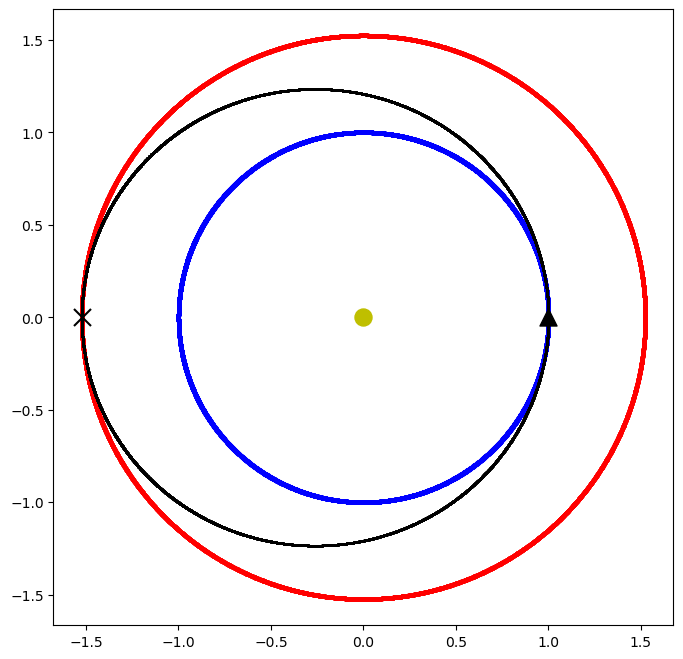

In [13]:
# Now plot the solution to check that it is right
rarr_ideal = odeint(grav_derivs, (1., 0., 0., v_launch), times)

plt.figure(figsize=(8,8))
plt.scatter(rarr2[:,0], rarr2[:,1], c='b', s=5)
plt.scatter(rarr4[:,0], rarr4[:,1], c='r', s=4)
plt.scatter(rarr_ideal[:,0], rarr_ideal[:,1], c='k', s=1)
plt.scatter(0., 0., c='y', s=150) # The sun
plt.scatter(1., 0., c='k', marker='^', s=150) # Earth / start position
plt.scatter(-r_mars, 0, c='k', marker='x', s=150) # shapeship reaches mars
plt.gca().set_aspect('equal', 'datalim')

## Exercise

(quite difficult): This orbit only works when Earth and Mars are at certain positions. Find the correct relative positions of Earth and Mars such that the spacecraft reaches Mars, then plot your solution. How far apart in time are the launch windows?

In [14]:
# First, we get the spaceship and mars' positions
r_init6 = (r_mars, 0., 0., np.sqrt(scale_factor/r_mars)) # FIXME: Set correct x and vy for Mars
rarr6 = odeint(grav_derivs, r_init6, times)

r_init7 = (1., 0., 0., v_launch)
rarr7 = odeint(grav_derivs, r_init7, times)

In [15]:
# When does the orbit reach Mars?
# i.e. the left side of the plot
i_mars = np.argmin(rarr7[:,0])
t_mars = times[i_mars]
t_mars

np.float64(9.210921092109212)

In [16]:
# How far does Mars rotate in this time?
angle_diff = np.arctan2(rarr6[i_mars,1], rarr6[i_mars,0])

In [17]:
# We need Mars to be at 180 degrees at this time
angle_mars = np.pi - angle_diff

v_mars = np.sqrt(scale_factor/r_mars)
r_init8 = (r_mars*np.cos(angle_mars),
            r_mars*np.sin(angle_mars),
            -v_mars*np.sin(angle_mars),
            v_mars*np.cos(angle_mars))
rarr8 = odeint(grav_derivs, r_init8, times)

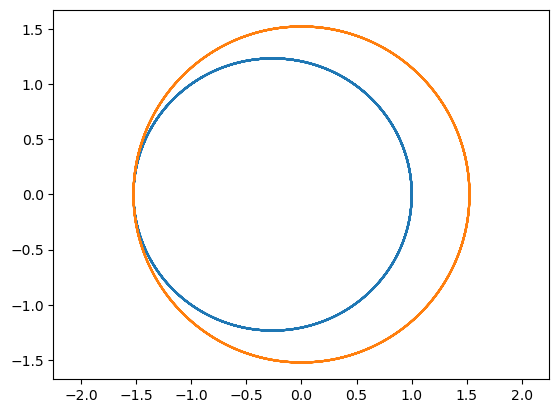

In [18]:
plt.plot(rarr7[:i_mars,0], rarr7[:i_mars,1])
plt.plot(rarr8[:i_mars,0], rarr8[:i_mars,1])
plt.gca().set_aspect('equal', 'datalim')

How far apart are the times when the mars is this angular distance ahead of earth?

Launch windows are 2.132 years apart


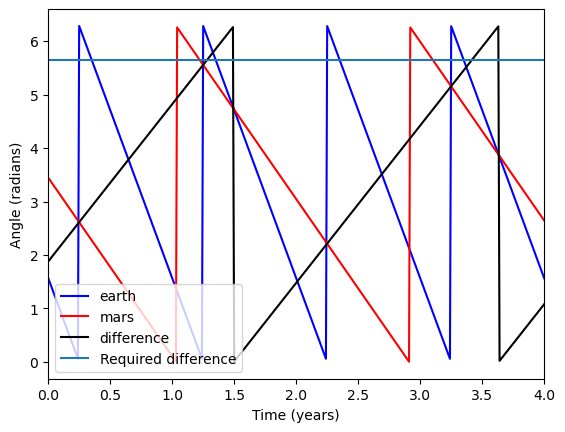

In [47]:

earth_angle = np.arctan2(rarr2[:,0], rarr2[:,1])
mars_angle = np.arctan2(rarr8[:,0], rarr8[:,1]) + angle_diff
plt.plot(times, earth_angle % (2*np.pi), c='b', label='earth')
plt.plot(times, mars_angle % (2*np.pi), c='r', label='mars')
plt.plot(times,(mars_angle - earth_angle) % (2*np.pi), c='k', label='difference')
plt.axhline(2 * np.pi + angle_diff, label='Required difference')
plt.legend()
plt.xlabel('Time (years)')
plt.ylabel('Angle (radians)')
plt.xlim(0,4)

# Find the times when the angles match
match_idx = np.flatnonzero(abs((mars_angle - earth_angle) - angle_diff) < 0.02)

# Get the differences between the times - this will be how regular this happens
differences = np.diff(times[match_idx])
# If the differences are less than 0.05 years, this is probably the same instance
differences = differences[differences > 0.05]
# Get the mean of the time differences
print(f"Launch windows are {differences.mean():.3f} years apart")
